<a href="https://colab.research.google.com/github/imenebak/University-of-Liverpool-ion-switching/blob/master/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If using collab**

In [14]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

{}

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "ur username"
os.environ['KAGGLE_KEY'] = "ur kaggle key"
#! mkdir /content/kaggle/input
#os.chdir("/content/kaggle/input")
!kaggle competitions download -c liverpool-ion-switching

 50% 5.00M/9.91M [00:00<00:00, 19.1MB/s]
100% 9.91M/9.91M [00:00<00:00, 33.1MB/s]
100% 4.27M/4.27M [00:00<00:00, 39.3MB/s]

 34% 9.00M/26.6M [00:00<00:00, 20.1MB/s]
100% 26.6M/26.6M [00:00<00:00, 49.3MB/s]


In [7]:
! mkdir /content/kaggle
! mkdir /content/kaggle/input
!unzip sample_submission.csv.zip -d /content/kaggle/input/
!unzip test.csv.zip -d /content/kaggle/input/
!unzip train.csv.zip -d /content/kaggle/input/

Archive:  sample_submission.csv.zip
  inflating: /content/kaggle/input/sample_submission.csv  
Archive:  test.csv.zip
  inflating: /content/kaggle/input/test.csv  
Archive:  train.csv.zip
  inflating: /content/kaggle/input/train.csv  


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
f = []
#!dir
for dirname, _, filenames in os.walk('/content/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        f.append(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

/content/kaggle/input/sample_submission.csv
/content/kaggle/input/test.csv
/content/kaggle/input/train.csv


In [10]:
import csv
f_data = []
for fil in f :
    print(fil)
    with open(fil) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            print(row)
            f_data.append([fil, row])
            break
    csvfile.close()

/content/kaggle/input/sample_submission.csv
['time', 'open_channels']
/content/kaggle/input/test.csv
['time', 'signal']
/content/kaggle/input/train.csv
['time', 'signal', 'open_channels']


In [11]:
for fil,data in f_data:
    with open(fil, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        print(reader)
        for row in reader:
            for d in data:
                print(d)
                print(row[d])
            break

time
500.0001
open_channels
0
time
500.0001
signal
-2.6498
time
0.0001
signal
-2.7600
open_channels
0


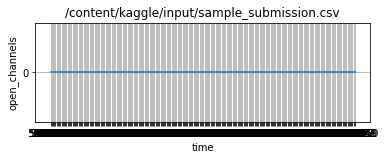

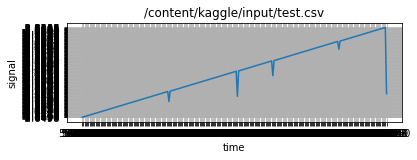

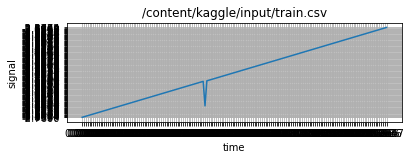

In [13]:
import matplotlib.pyplot as plt
x,y = [],[]
m = 0
for fil,data in f_data:
    with open(fil, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
          for d in data:
            if(m<500):
              m += 1
              x.append(row[data[0]])
              y.append(row[data[1]])
        m = 0
        plt.subplot(212)
        plt.ylabel(data[1])
        plt.xlabel(data[0])
        plt.title(fil)
        plt.plot(x,y)
        plt.grid(True)
        plt.show()
        x,y = [],[]